In [175]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit


In [176]:
#findig intensities from figure 4 , by hand or web digitizer - HOW?

In [177]:
#reference, need to correct
I_quasar = 0.99123
I_quasar_err = 4.25e-3
I1 = 0.88596
I2 = 0.83333
I3 = 0.71930
I4 = 0.59649
I5 = 0.48246
I = [I1, I2, I3, I4, I5]
Ierr = [8.77e-3, 21.93e-3, 26.32e-3, 43.86e-3, 43.86e-3] 
red = [3.0, 3.3, 3.7, 4.1, 4.75]
red_err = [0.1, 0.2, 0.2, 0.2, 0.45] #redshift is the midpoint of the bin, and the corresponding errors is the #binzie = z1+z2/2

In [178]:
#define optical depth from equation 2 of manual
def optical_depth(intensity,intensity_quasar):
    return np.log(intensity_quasar/intensity)
tau_list = []
for i in I:
    tau = optical_depth(i,I_quasar)
    tau_list.append(tau)
tau_list

[0.11227479334166743,
 0.17351687402055946,
 0.32066807932743135,
 0.5078841192626425,
 0.7200485804126293]

In [179]:
#fitting a curve to this data
def func(x,a,b):
    return a*x+b
popt,pcov = curve_fit(func,red, tau_list )

model = func(np.array(red),*popt) #converted to array since it cannot take list

popt

array([ 0.36165153, -0.99654776])

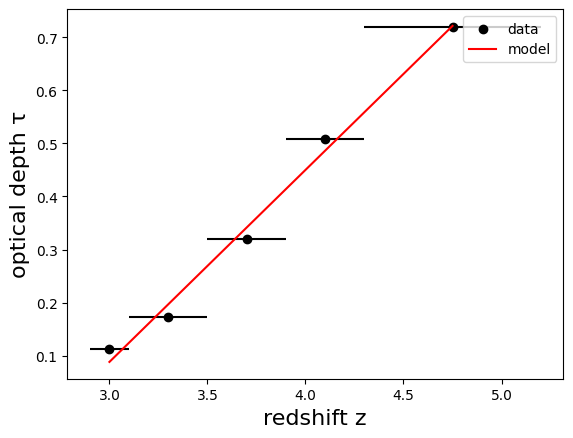

In [180]:
plt.errorbar(red, tau_list,xerr= red_err , linestyle = 'none', c='k')
plt.scatter(red, tau_list,  label = 'data', c = 'k')
plt.plot(red, model, label = 'model', c= 'r')
plt.xlabel("redshift z", fontsize =16)
plt.ylabel("optical depth τ", fontsize =16)
plt.legend()
plt.savefig("tau_dist.png", dpi=300, bbox_inches='tight')


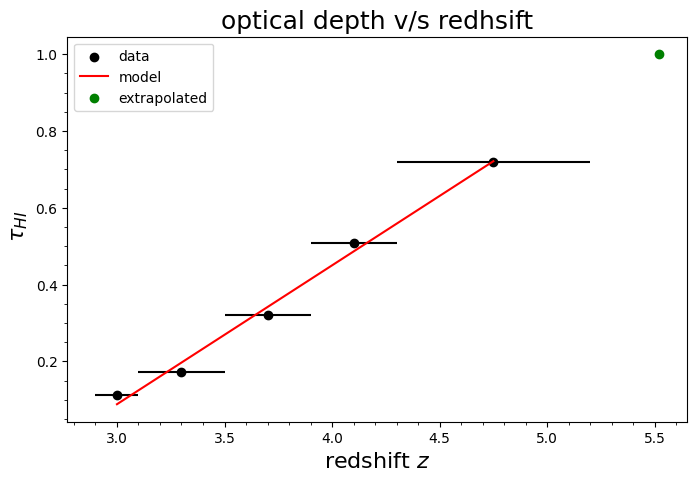

In [181]:
#extrapolating to the point where we expect complete absorption (tau = 1)
#in other words tau = a*x+b = 1
#=> x = 1-b/a
red_tau_1 = (1-popt[1])/popt[0]
plt.figure(figsize=(8,5))
plt.errorbar(red, tau_list,xerr= red_err , linestyle = 'none', c='k')
plt.scatter(red, tau_list, label = 'data', c = 'k')
plt.plot(red, model, label = 'model', c= 'r')
plt.scatter(red_tau_1, 1, label = 'extrapolated', c='g')
plt.xlabel("redshift $z$", fontsize = 16)
plt.ylabel(" $τ_{HI}$" , fontsize = 16)
plt.legend()
plt.title("optical depth v/s redhsift", fontsize = 18)
plt.minorticks_on()
plt.savefig("tau_dist_ext.png", dpi=300, bbox_inches='tight')



In [182]:
redmodel = np.arange(min(red), max(red), 0.4)
len(redmodel)

5

In [183]:
red_tau_1

5.52063967827292

In [184]:
#remember, using CGS units
s_0 = 4.5e-18 #cm^2
Mpc = 3.0856775814913673e24  # cm
km = 1.0e5 # cm
H_0 = 67.4 * km/Mpc
c = 2.99792458e10   # cm/s speed of light

In [185]:
#plotting number density of neutral hydrogen as a function of redhsift
def density(z, t):
    return (t * H_0 *(1 + z)**(3/2))/(s_0 * c)
n_H_1 = []
for m,n in zip(red, tau_list):

    number = density(m,n)
    n_H_1.append(number)
#we get number density at each of the redshifts
n_H_1

[1.454281186855113e-11,
 2.5050738476441864e-11,
 5.2902799196554476e-11,
 9.471004263000872e-11,
 1.6074582433338634e-10]

In [186]:
def nonlinear_model(z, p, q):
    return (p*z + q) * (1 + z)**(1.5)
popt1, pcov1 = curve_fit(nonlinear_model, red, n_H_1)
red_model_1 = np.arange(min(red), red_tau_1+0.5,0.01)
model1 = nonlinear_model(red_model_1, *popt1)

density_tau_1 = density(red_tau_1, 1)
#different fitting needed ?

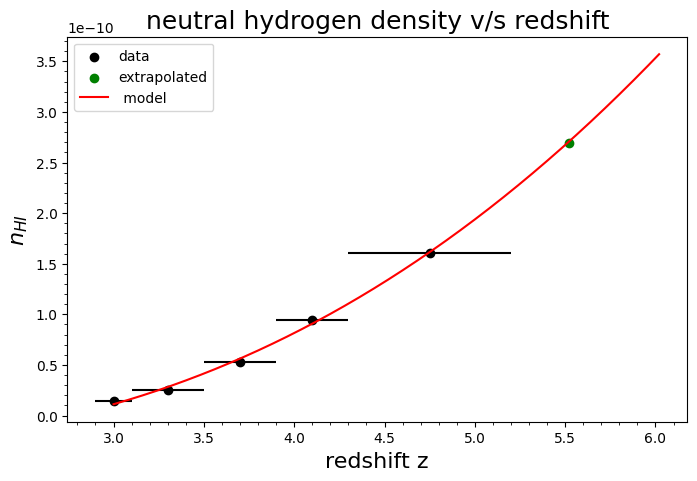

In [187]:
plt.figure(figsize=(8,5))
plt.errorbar(red, n_H_1,xerr= red_err , linestyle = 'none', c='k')
plt.scatter(red, n_H_1 , label = 'data' , c= 'k')
plt.scatter(red_tau_1, density_tau_1 , label = 'extrapolated', c= 'g')
plt.plot(red_model_1, model1, label = ' model' , c= 'r')
plt.xlabel("redshift z", fontsize = 16, )
plt.ylabel("$n_{HI}$", fontsize = 16)
plt.title("neutral hydrogen density v/s redshift", fontsize = 18)
plt.minorticks_on()
plt.legend()
plt.savefig("neutral_dist_ext.png", dpi=300, bbox_inches='tight')



In [188]:
#computing omega_H1 as a function of redshift 
def omega(numdens , z):
    return ( 8 * np.pi * G * m_p * numdens ) / (3 * H_0**2 * (1+z)**3  )


In [189]:
G = 6.67430e-8 # cm3 g-1 s-2
m_p = 1.67262192369e-24 # g
omega_H_1 = []
for num, m in zip(n_H_1, red):
    om = omega(num, m)
    omega_H_1.append(om)
omega_H_1

[4.454221633736921e-08,
 6.176160553650488e-08,
 9.988228961922865e-08,
 1.3995515989223585e-07,
 1.6574467218415717e-07]

In [190]:
def omega_model(z, m, n):
    return (m*z + n) * (1 + z)**(-1.5)

popt2,pcov2 = curve_fit(omega_model, red, omega_H_1)
red_model_2 = np.arange(min(red), red_tau_1+0.5,0.01)
model2 = omega_model(red_model_2, *popt2)
omega_H_1_tau_1 = omega(density_tau_1 , red_tau_1)

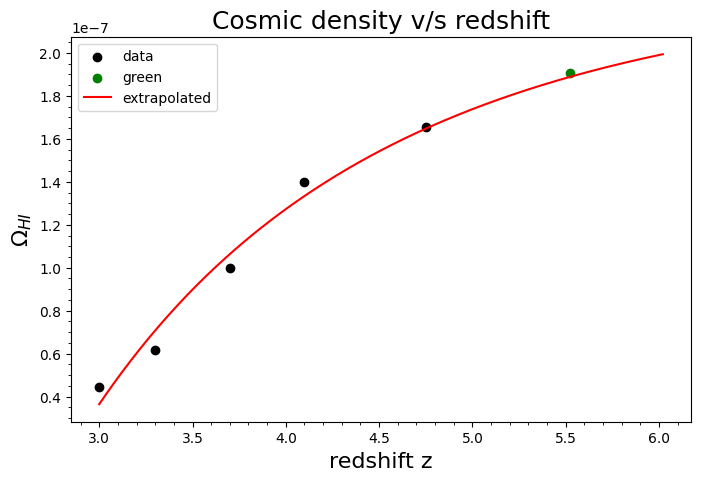

In [191]:
plt.figure(figsize=(8,5))

plt.scatter(red, omega_H_1 , label = 'data' , c='k')
plt.scatter(red_tau_1, omega_H_1_tau_1, c= 'g' , label = 'green')
plt.plot(red_model_2, model2, c= 'r', label = 'extrapolated')
plt.minorticks_on()
plt.title("Cosmic density v/s redshift",fontsize = 18)
plt.xlabel("redshift z",fontsize = 16)
plt.ylabel("$\Omega_{HI}$",fontsize = 16)
plt.legend()
plt.savefig("cosmic_dist_ext.png", dpi=300, bbox_inches='tight')


In [192]:
omega_H = 0.00625 * (62.66/100)**(-2)
#omega_H ~ omega_H_11:
omega_H_2 = omega_H
#using equation 15
def density2(dens,om1):
    return (omega_H_2/om1) * dens
n_H_2 = []
for d,o in zip(n_H_1, omega_H_1):
    nH2 = density2(d,o)
    n_H_2.append(nH2)
omega_H_2

0.01591839350248363

In [193]:
print(red)
print(n_H_1)
print(n_H_2)

[3.0, 3.3, 3.7, 4.1, 4.75]
[1.454281186855113e-11, 2.5050738476441864e-11, 5.2902799196554476e-11, 9.471004263000872e-11, 1.6074582433338634e-10]
[5.197276224487464e-06, 6.456560012192574e-06, 8.431200147733783e-06, 1.0772248257101352e-05, 1.543829585530737e-05]


In [194]:
alpha_rec = 4e-13 #cm^3 s^-1
sigma_ion = 6e-18 #cm^2
flux_ionizing = []
for nH1, nH2 in zip(n_H_1, n_H_2):
    flux_ion = ( alpha_rec * nH2**2 )/(sigma_ion * nH1)
    flux_ionizing.append(flux_ion)
flux_ionizing

[123826.03125069418,
 110940.62085301397,
 89579.55219853582,
 81681.82189925134,
 98847.97107665756]

In [195]:
#gaussian error propagation 
#1st - computing tau error
def tau_err(Ix, delta_Ix, Iquasar, delta_Iquasar):
   
    term_quasar = (delta_Iquasar / Iquasar)**2
    term_x = (delta_Ix / Ix)**2
    delta_tau = np.sqrt(term_quasar + term_x)
    return delta_tau
#computing tau error
delta_tau = tau_err(np.array(I) , np.array(Ierr) , I_quasar , I_quasar_err)
delta_tau

array([0.01078754, 0.0266631 , 0.03684148, 0.07365505, 0.09101014])

In [196]:
#2nd - computing neutral hydrogen density error
def n_H_1_err(tau, del_tau, z, del_z, H_0, sigma_0, c):
    term1 = H_0/(s_0 * c) * (1+z)**(3/2) * del_tau 
    term2 = H_0/(s_0 * c) * tau * 3/2 * (1+z)**(1/2) * del_z 
    return np.sqrt(term1**2 + term2**2)
delta_n_H_1 = n_H_1_err(np.array(tau_list) , delta_tau , np.array(red), red_err , H_0 , s_0 , c)
delta_n_H_1

array([1.49995036e-12, 4.22755041e-12, 6.95302533e-12, 1.48220391e-11,
       2.77286665e-11])

In [197]:
def omega_H_1_err(tau, del_tau , z, del_z , H_0, s_0 , c):

    const = (8 * np.pi * G * m_p )/ (3 * H_0 * s_0 * c )
    term1 = del_tau * (1+z)**(-3/2) 
    term2 = 3/2 * tau * (1+z)**(-5/2) * del_z
    return const *np.sqrt(term1**2 + term2**2)
delta_omega_H_1 = omega_H_1_err(np.array(tau_list) , delta_tau , np.array(red) , red_err , H_0 , s_0 , c )
delta_omega_H_1

array([4.59409873e-09, 1.04228584e-08, 1.31275490e-08, 2.19028605e-08,
       2.85909681e-08])

In [198]:
# Fitted parameters from column density distribution
A = 6.00e+08           # Normalization constant
beta = -0.50       # Power-law index
# Calculate the constant prefactor
C = (8 * np.pi * G * m_p) / (3 * H_0 * c)
# Column density range (cm⁻²)
N1 = 10**12.5      # Lower limit
N2 = 10**14       # Upper limit
# Compute Ω_HI for each redshift
term = (N2**(beta + 1) - N1**(beta + 1)) / (beta + 1)
omega_hi = C * A * term * (1+3.13)**(-0.5)
omega_hi

6.933635274628186e-08

In [199]:
def calculate_omega_hi(A, beta, z, N1=10**12.5, N2=10**14):
  
    # Calculate constant prefactor
    C = (8 * np.pi * G * m_p) / (3 * H_0 * c)
    
    # Compute integral term
    term = (N2**(beta + 1) - N1**(beta + 1)) / (beta + 1)
    
    # Calculate Ω_HI with redshift evolution factor
    return C * A * term * (1 + z)**(-0.5)
omega_1 = calculate_omega_hi(6e8,-0.5,3.13,N1,N2)
omega_2 = calculate_omega_hi(4.7e7,-0.42,3.13,N1,N2)
omega_3 = calculate_omega_hi(3.39e7,-0.41,3.13,N1,N2)


In [204]:
print(red)
print(n_H_1)
print(n_H_2)
print(flux_ionizing)

[3.0, 3.3, 3.7, 4.1, 4.75]
[1.454281186855113e-11, 2.5050738476441864e-11, 5.2902799196554476e-11, 9.471004263000872e-11, 1.6074582433338634e-10]
[5.197276224487464e-06, 6.456560012192574e-06, 8.431200147733783e-06, 1.0772248257101352e-05, 1.543829585530737e-05]
[123826.03125069418, 110940.62085301397, 89579.55219853582, 81681.82189925134, 98847.97107665756]


In [201]:
ratio = n_H_2[1] / n_H_1[1]
omega_hii_1 = omega_1 * ratio 
omega_hii_2 = omega_2 * ratio 
omega_hii_3 = omega_3 * ratio 


In [202]:
#lyman alpha 
print(omega_1)
print(omega_2)
print(omega_3)
#lyman alpha 
print(omega_hii_1)
print(omega_hii_2)
print(omega_hii_3)

6.933635274628186e-08
6.494639854231488e-08
6.390367901985375e-08
0.017870703610351556
0.01673923984949895
0.016470490040826194


In [203]:
# Fitted parameters from column density distribution
A = 6.00e+08           # Normalization constant
beta = -0.50       # Power-law index
# Calculate the constant prefactor
C = (8 * np.pi * G * m_p) / (3 * H_0 * c)
# Column density range (cm⁻²)
N1 = 10**12.5      # Lower limit
N2 = 10**14       # Upper limit
# Compute Ω_HI for each redshift\
term = (N2**(beta + 1) - N1**(beta + 1)) / (beta + 1)
omega_hi = C * A * term * (1+3.13)**(-0.5)
omega_hi

6.933635274628186e-08